# Gradient Descent

In this notebook, we will explore what gradient-based optimization is.

Are you wondering why we're starting here?
Here's why: almost every neural network model that is seen out in the wild
is trained by some form of gradient descent.
If you have a strong intuition for gradient descent,
you will have a tremendous chunk of neural network land demystified.

Are you ready? Let's get going! 😃

## A brief introduction to _optimization_

Firstly, we need to understand what we mean by the term _optimization_.
Optimization is something we might do in our daily lives,
and that's where we can find great analogies.

For example, finding driving directions
that minimize the amount of time you take to get from A to B,
and we would tweak the route we take to achieve that goal.

Another example is finding stock picks to maximize financial returns,
and we would tweak our stock picks to achieve that goal.

These two analogies illuminate the core of optimization:
What we mean by optimization really is
_finding the minimum or maximum value_ of some function
by tweaking some inputs to that function.

What other analogies can you think of?
Try writing them down for yourself and evaluate whether they follow the same intuition
of tweaking inputs/levers to minimize/maximize an outcome.

## An anchoring example for the math of optimization

In the deep learning world,
optimization almost always takes place in the context of some math function.
I am always a fan of anchoring examples,
so let's take a math function drawn from a family
that many of us would be familiar with -
the 2nd-degree polynomial.
Let's use a specific one, $f(x) = x^2 + 3x - 5$.
Plotted in code, it looks something like the following:

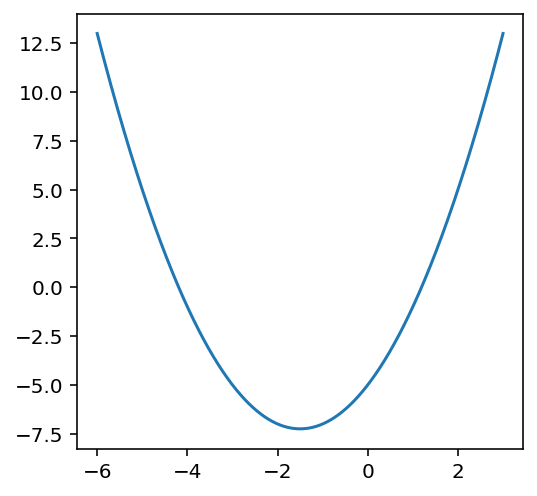

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def f(x):
    return x ** 2 + 3 * x - 5


fig, ax = plt.subplots(figsize=(4, 4))
x = np.linspace(-6, 3, 1000)
plt.plot(x, f(x));

### Analytically minimizing $f(x)$

$f(x)$ is a smiley-faced function,
thus we know that $f(x)$ has a minimum value.
For those of you who know how to take derivatives,
you can probably work out that the minimum value occurs at $x=-1.5$.
As a refresher for those who need it,
we start by figuring out what $f'(x)$,
the derivative of $f(x)$ w.r.t. $x$, looks like.
From introductory calculus, to find the minima or maxima of a function,
we know that the value of the derivative at that point is equal to zero,
so to find the value of $x$ at which $f'(x)$ is zero, we solve the equation:

$$f'(x) = 2x + 3 = 0$$
$$x = -1.5$$

Just to be doubly-sure that we are finding a minima,
we might also want to check the second derivative to make sure it is positive.
That's an exercise you may attempt on your own if you desire.

The derivative function $f'(x)$ is also known as the _gradient function_.
The derivative function tells us how $y$ will change as we change $x$;
it always points us in the way that we need to change $x$
to increase the value of $f(x)$.
You can verify this by plugging in
different values of $x$ into the derivative function.
At values to the left of the minima, you will get negative numbers
while at values to the right of the minima, you will get positive numbers.

### Minimizing the polynomial _computationally_

While for simple polynomials we can take gradients easily,
for complicated math functions,
finding an analytical solution to identify the minima or maxima
might not be easy!
But fret not, that's where computers come into the picture.
There is a general purpose way of finding minima or maxima analytically,
and that is by gradient descent.

The core of gradient descent is as follows:
We pick a starting point at will -
there are heuristics to pick good starting points,
but for now, let's be satisfied with "at random".
We take little steps in the _negative_ direction of the gradient.
At each step, we evaluate the gradient
and then take a small step in $x$ that lets us follow
the negative direction of the gradient.
We repeat this process over and over
for a fixed number of steps
(which needs to be configured beforehand).
This routine is what we call _gradient descent_.

<img src="../images/01-gradient-descent/gradient-descent-diagram.png">

Those of you who are attuned to the algorithm
might see the following key knobs for gradient descent:

- Where the initial point is.
- How large of a step to take.
- How many steps to take.

We won't immediately address how to set these,
but you should know that those knobs exist.
At this point in the course,
I'd ask that you accept the default values that we'll provide for you
knowing that pragmatically speaking,
they'll help you solve the exercises you encounter
in a reasonable amount of time.

### The workhorse powered by _automatic differentiation_

Gradient descent is the workhorse of all of modern deep learning.
Whenever we fit a deep learning model,
we are also minimizing a function -- 
the _loss function_ -- 
that tells us how bad our model is.
We'll visit the idea of a loss function in the second notebook,
so keep that name in your mind for the time being.
For now, though, in order to help you get familiar with gradient descent
and how to write a program that uses gradient descent in it,
we're going to introduce to you an _automatic differentiation system_:
a program that can return the derivative function
of any function that performs numerical computation.
We'll be using JAX,
which provides automatic differentiation on top of the NumPy API --
an API that many of us in the scientific Python world should be familiar with.

## JAX's `grad` function

Remember, when we are training a model to do some prediction,
we need a way of calculating gradient functions so that we can do gradient-based optimization.
Calculating the gradient function by hand is sometimes easy,
especially if you're competent with algebra and calculus.
However, in many cases, calculating the gradient function by hand is tedious and repetitive.
As it turns out, though, tedious and repetitive tasks are _exactly_ what computers are great at!

This is where JAX comes in.
JAX is a Python package developed by friends at Google.
You can think of JAX as the NumPy API turned on steroids. 
JAX ships with an automatic differentiation system,
exposed to end-users in a simple function: `grad`.

Here's what `grad` does.
It takes in a function that returns a scalar output,
and returns another _transformed_ function.
That newly returned function is the gradient function of the original.
The gradient function takes in the same arguments as the original,
but will evaluate the gradient of the original function w.r.t. the arguments passed in.

### Example use of `grad`

Let's see a concrete example of this in action.

We have here an $x^2$ polynomial function:

$$ f(x) = 3x^2 + 4x - 2 $$

Implemented in NumPy, it'll look like this:

In [2]:
def func(x):
    return 3 * x**2 + 4 * x - 2

Analytically, `func`'s gradient function is going to be:

$$ f'(x) = 6x + 4 $$

If we wanted, we could write that gradient function in NumPy by hand.
However, we're instead going to obtain the gradient function using JAX's `grad` function.

In [3]:
from jax import grad

func_p = grad(func)

Pictorially, we'd represent the transformation as follows:

<img src="../images/01-gradient-descent/grad-transform.png">

Here, `grad` acts as a program transformation device
that takes `f` and turns it into `f'`, a.k.a. the first-order derivative of `f`.
(You can keep passing the result through `grad` if you desire!)

Now, we can evaluate the gradient function w.r.t. any value of $x$.
Let's sanity-check that we have it right.
If we plug in x = 3, then $f'(x) = 6(3) + 4 = 22$.
Calling the same on `func_p`:

In [4]:
func_p(3.0)

DeviceArray(22., dtype=float32)

In the Jupyter notebook, I would encourage you to hand-calculate the gradient evaluated at various values of $x$ to convince yourself that `grad` does the right thing.

## Gradient Descent

Seeing how `grad` works isn't the main point though! We want to use the gradient function `func_p` in an optimization routine to _minimize_ the function `func`. Here's how we do it.

### Step 1: Initialize `x`

Firstly, we start by initializing $x$ at some value.

In [5]:
x = 4.2

I chose a fixed value to start, but you could have just as well drawn a number from a random number generator instead.

### Step 2: Take small steps in negative direction of gradient

Next, we take steps in the negative direction of the gradient a fixed number of times.

In [6]:
# hyperparameters
num_steps = 300
step_size = 5e-3

# loop
for i in range(num_steps):
    x -= func_p(x) * step_size


There are two _hyperparameters_ that we can configure here - the number of steps and the step size. Step sizes are canonically smaller than 1.0, and most of the time set by default to 0.005. (There's an Andrej Karpathy tweet about this.) The smaller the step size, the more steps may be needed to reach convergence. The number of steps is the other hyperparameter; the longer we run, the more likely we are to converge on the minima.

### Step 3: Verify proximity to stationary point

Let's make sure that we have hit someplace near a _stationary point_ in our optimization routine. Stationary points refer to places where the derivative of the function, or the evaluated gradient, is equal to zero.


In [7]:
func_p(x)

DeviceArray(0.0031395, dtype=float32)

Indeed, we have!
And that's a great sign that we're doing the right thing _computationally_.

### Step 4: Check second derivative

Let's also evaluate the second derivative to sanity-check that we have hit a minima.

In [8]:
func_pp = grad(func_p)
func_pp(x)

DeviceArray(6., dtype=float32)

And just like that, we see that the second derivative at our final value of `x` is a positive number,
so we know we're in a regime which is a minima!

## Exercises

Coming up is a pair of exercises for you to practice what you should have learned here today:

1. How to obtain the derivative function of a NumPy/Python function, and
2. How to use the evaluated derivative to find the minima of that function.

### Exercise: Obtaining the derivative function of a Python function

### Exercise: Finding the minima of a Python function using derivatives